In [155]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
main_df = pd.read_csv('../data/raw/diabetes.csv')
main_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h3>Eliminación de variables innecesarias</h3>

In [157]:
main_df = main_df.drop('Pregnancies', axis=1)

<h3>Búsqueda de valores vacíos</h3>

In [158]:
# Search empty data on columns
null_counts = main_df.isnull().sum()
print(null_counts)

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [159]:
# Search 0 values in columns
columns_to_check = main_df.columns.difference(['Outcome'])
rows_with_zeros = main_df[(main_df[columns_to_check] == 0).all(axis=1)]
print(rows_with_zeros)

Empty DataFrame
Columns: [Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


<h3>Búsqueda de duplicados</h3>

In [160]:
duplicated = main_df[main_df.duplicated()]
print(duplicated)

Empty DataFrame
Columns: [Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


<h3>Búsqueda de valores atípicos</h3>

In [161]:
# Get outliers percent
# def get_outliers(df):
#     columns = df.select_dtypes(include=[np.number]).columns

#     for column in columns:
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1

#         severe_lower = Q1 - 3 * IQR
#         lower = Q1 - 1.5 * IQR
#         upper = Q1 + 1.5 * IQR
#         severe_upper = Q1 + 3 * IQR

#         outliers = (df[column] < lower) | (df[column] > upper)
#         severe_outliers = (df[column] < severe_lower) | (df[column] > severe_upper)
        
#         outliers_percent = outliers.sum() / len(df) * 100
#         severe_outliers_percent = severe_outliers.sum() / len(df) * 100

#         if outliers_percent <= 5:
#             df = df[~outliers]
        
#         if severe_outliers_percent <= 5:
#             df = df[~severe_outliers]
    
#     return df


# print(main_df.shape)
# main_df_cleaned = get_outliers(main_df)
# print(main_df_cleaned.shape)

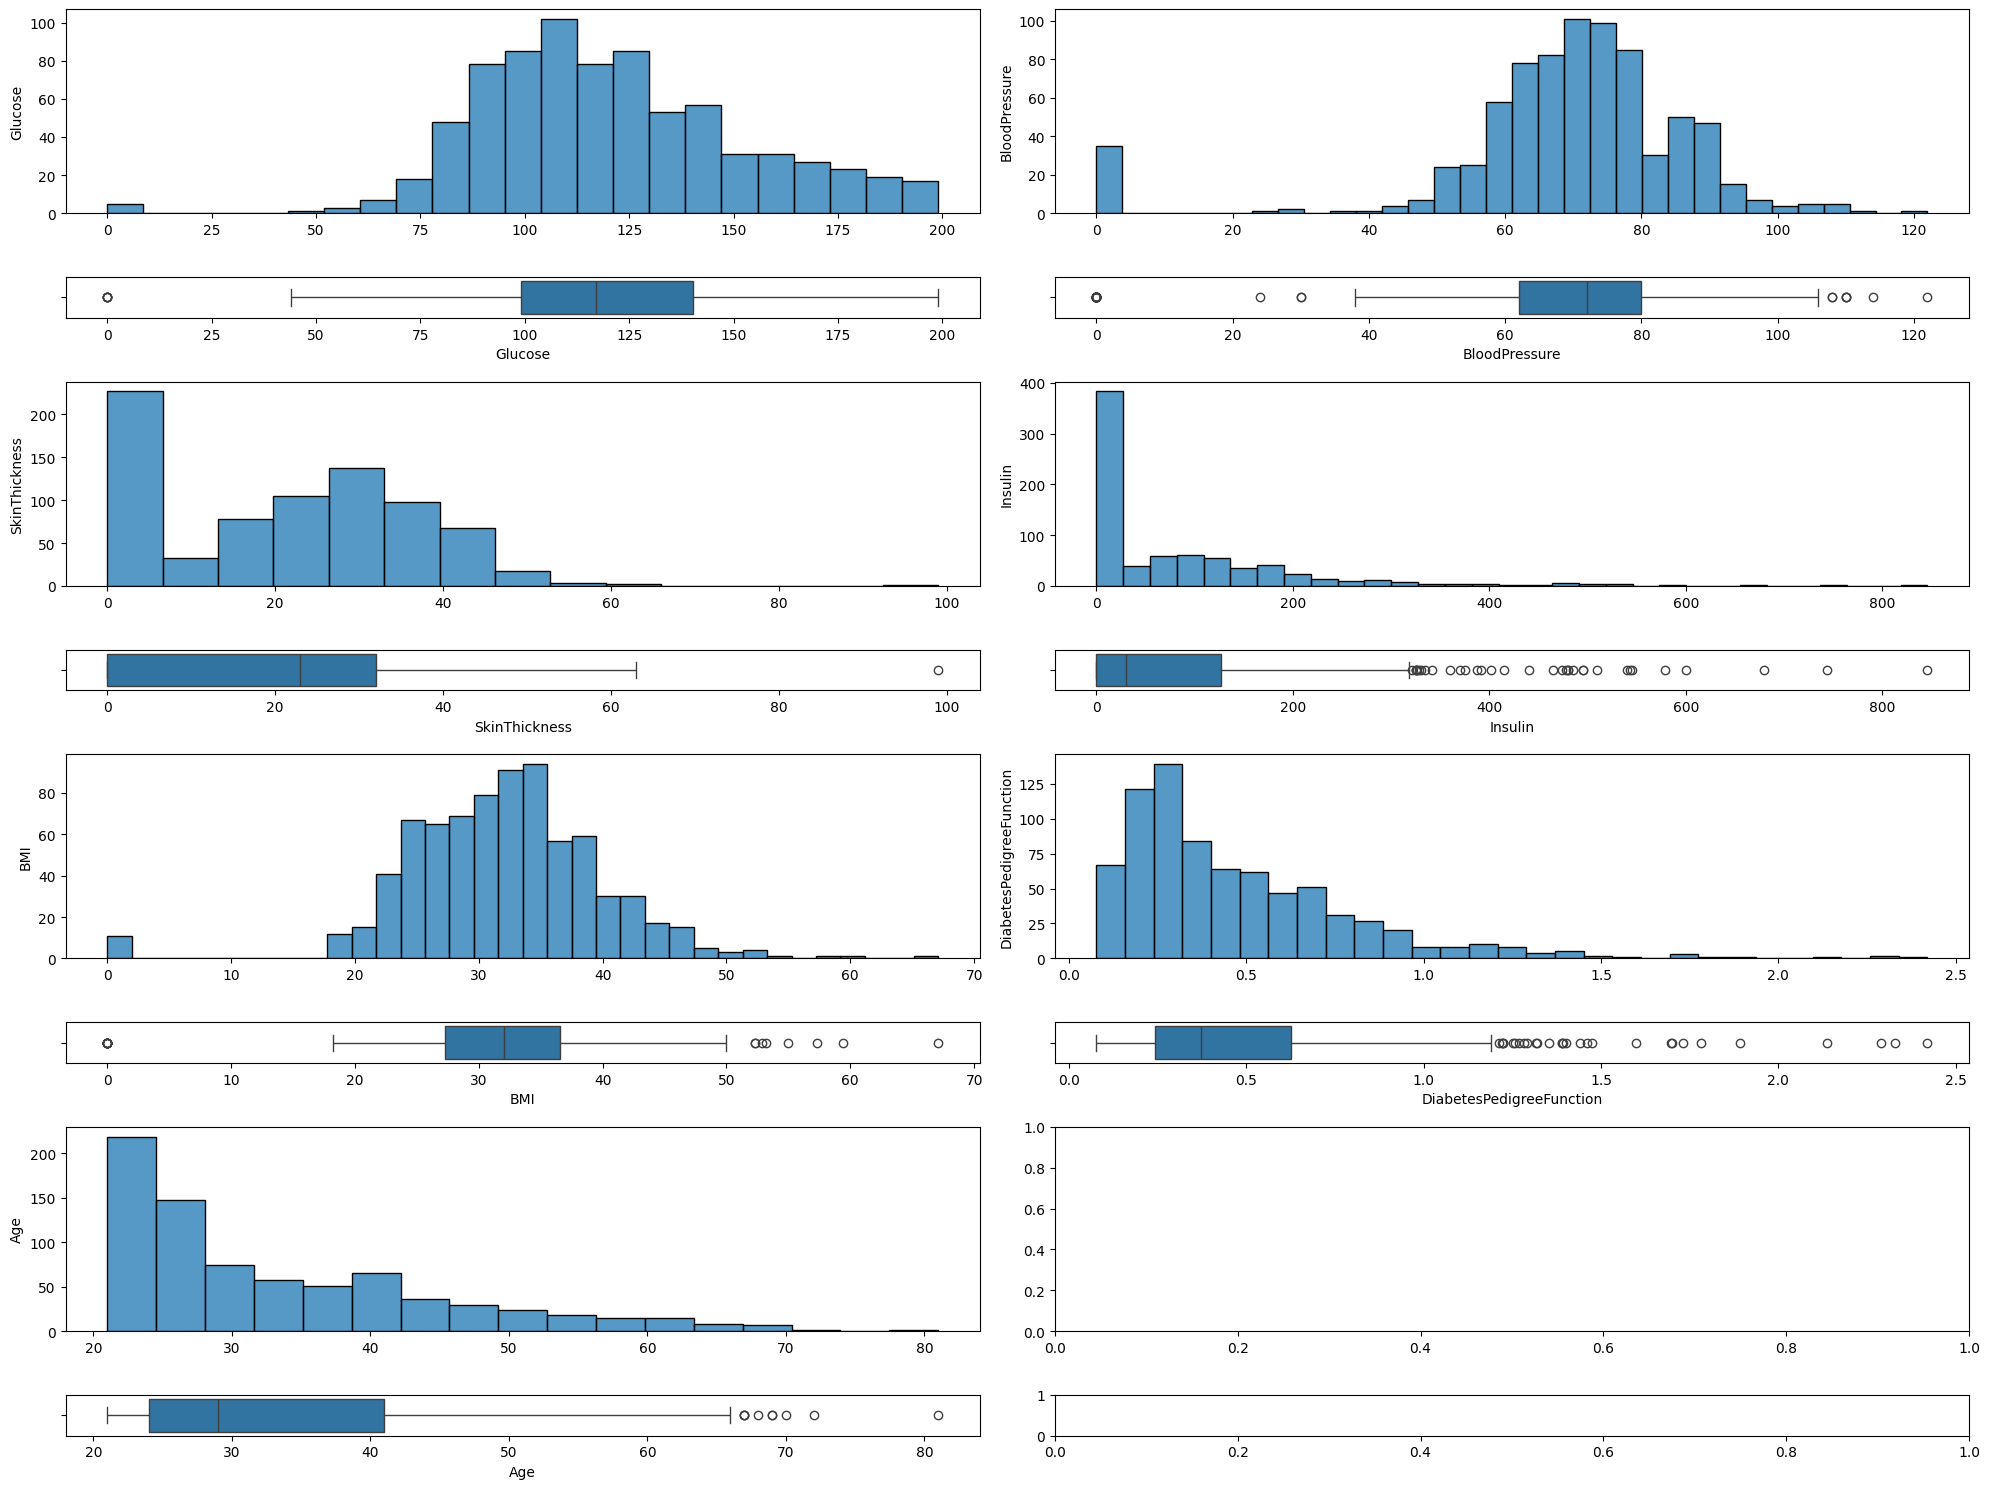

In [162]:
fig, axis = plt.subplots(8, 2, figsize=(20, 15), gridspec_kw={'height_ratios': [10, 2] * 4})

sns.histplot(ax=axis[0, 0], data=main_df, x="Glucose").set(xlabel=None)
axis[0, 0].set_ylabel('Glucose')
sns.boxplot(ax=axis[1, 0], data=main_df, x="Glucose")

sns.histplot(ax=axis[0, 1], data=main_df, x="BloodPressure").set(xlabel=None)
axis[0, 1].set_ylabel('BloodPressure')
sns.boxplot(ax=axis[1, 1], data=main_df, x="BloodPressure")

sns.histplot(ax=axis[2, 0], data=main_df, x="SkinThickness").set(xlabel=None)
axis[2, 0].set_ylabel('SkinThickness')
sns.boxplot(ax=axis[3, 0], data=main_df, x="SkinThickness")

sns.histplot(ax=axis[2, 1], data=main_df, x="Insulin").set(xlabel=None)
axis[2, 1].set_ylabel('Insulin')
sns.boxplot(ax=axis[3, 1], data=main_df, x="Insulin")

sns.histplot(ax=axis[4, 0], data=main_df, x="BMI").set(xlabel=None)
axis[4, 0].set_ylabel('BMI')
sns.boxplot(ax=axis[5, 0], data=main_df, x="BMI")

sns.histplot(ax=axis[4, 1], data=main_df, x="DiabetesPedigreeFunction").set(xlabel=None)
axis[4, 1].set_ylabel('DiabetesPedigreeFunction')
sns.boxplot(ax=axis[5, 1], data=main_df, x="DiabetesPedigreeFunction")

sns.histplot(ax=axis[6, 0], data=main_df, x="Age").set(xlabel=None)
axis[6, 0].set_ylabel('Age')
sns.boxplot(ax=axis[7, 0], data=main_df, x="Age")

plt.tight_layout()
plt.show()

In [163]:
# Check lowest data per column
columns_to_check = ['Glucose', 'BloodPressure', 'BMI']
lowest_values = main_df[columns_to_check].min()

count_lowest_values = (main_df[columns_to_check] == lowest_values).sum()

print(lowest_values)
print(count_lowest_values)

Glucose          0.0
BloodPressure    0.0
BMI              0.0
dtype: float64
Glucose           5
BloodPressure    35
BMI              11
dtype: int64


In [164]:
# print(main_df.shape)
mask = (main_df[columns_to_check] == lowest_values).any(axis=1)
main_df = main_df[~mask]
print(main_df.shape)

(724, 8)


In [165]:
# Check unreal data per column
main_df = main_df[main_df['Insulin'] <= 200]
main_df = main_df[main_df['BMI'] <= 50]
print(main_df.shape)
main_df = main_df[main_df['BloodPressure'] >= 40]

(634, 8)


Aunque se preparó el código para eliminar outliers irreales, al quitarlos del dataset, los resultados empeoran.

<h3>Análisis multivariante numérico-numérico</h3>

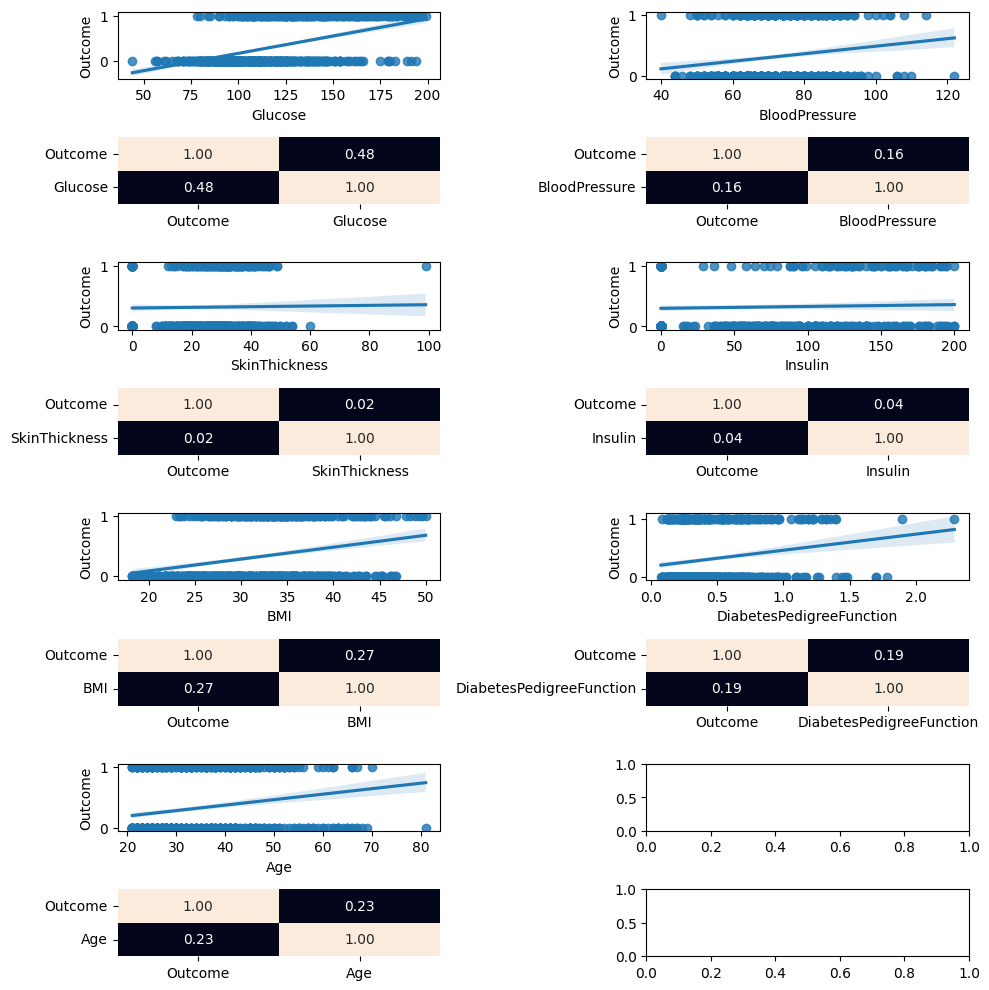

In [166]:
# Numerical-numerical analysis
fig, axis = plt.subplots(8, 2, figsize = (10, 10))

sns.regplot(ax = axis[0, 0], data = main_df, x = "Glucose", y = "Outcome")
sns.heatmap(main_df[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = main_df, x = "BloodPressure", y = "Outcome")
sns.heatmap(main_df[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[2, 0], data = main_df, x = "SkinThickness", y = "Outcome")
sns.heatmap(main_df[["Outcome", "SkinThickness"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = main_df, x = "Insulin", y = "Outcome")
sns.heatmap(main_df[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

sns.regplot(ax = axis[4, 0], data = main_df, x = "BMI", y = "Outcome")
sns.heatmap(main_df[["Outcome", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0], cbar = False)

sns.regplot(ax = axis[4, 1], data = main_df, x = "DiabetesPedigreeFunction", y = "Outcome")
sns.heatmap(main_df[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1], cbar = False)

sns.regplot(ax = axis[6, 0], data = main_df, x = "Age", y = "Outcome")
sns.heatmap(main_df[["Outcome", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[7, 0], cbar = False)

plt.tight_layout()
plt.show()

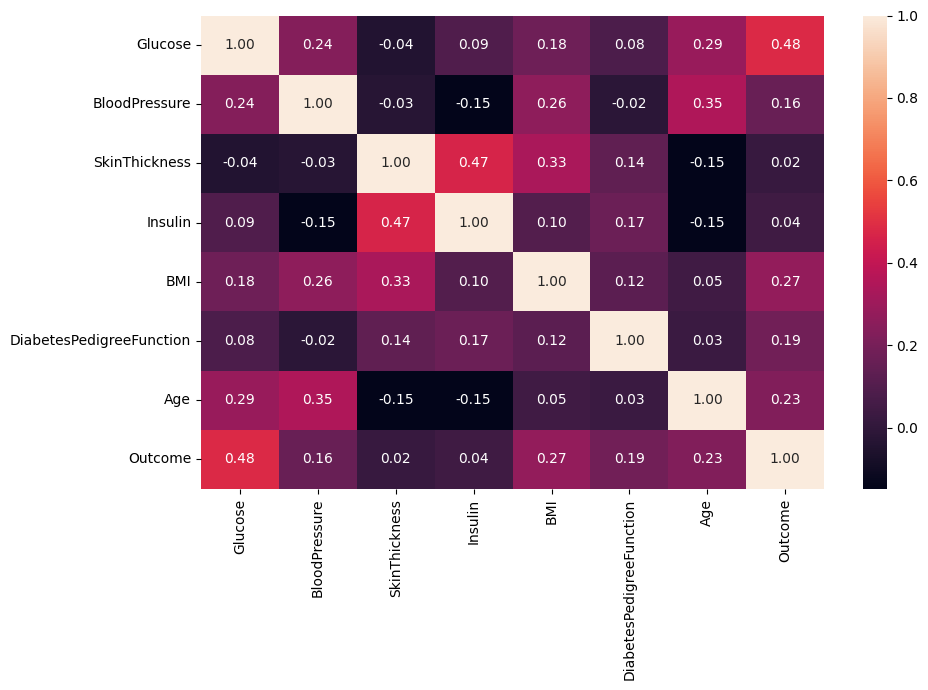

In [167]:
# Heatmap
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(main_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

In [168]:
# Descriptive analysis
main_df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000
mean,118.160063,72.301109,19.757528,51.353407,31.780507,0.457005,33.383518,0.313788
std,29.260755,11.872523,15.574904,63.136815,6.343587,0.310784,11.789368,0.464399
min,44.000000,40.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,97.000000,64.000000,0.000000,0.000000,27.100000,0.240000,24.000000,0.000000
50%,112.000000,72.000000,22.000000,0.000000,31.600000,0.362000,29.000000,0.000000
75%,136.000000,80.000000,32.000000,100.000000,35.800000,0.599000,41.000000,1.000000
max,199.000000,122.000000,99.000000,200.000000,50.000000,2.288000,81.000000,1.000000


In [169]:
# Save clean dataframe into a csv file
main_df.to_csv('../data/processed/PROCESSED_DF.csv', index=False, encoding='utf-8')